In [85]:
!pip install kds

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,roc_curve,roc_auc_score
import kds

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/My Drive/Colab Notebooks/


Mounted at /content/drive/
/content/drive/My Drive/Colab Notebooks


In [4]:
df1 = pd.read_csv('./DSBA6211_proj_datasets/Reddit_Combi.csv',on_bad_lines='skip',sep=';')
df1.drop(['body','Body_Title','Unnamed: 4'],inplace=True,axis=1)
df1

,title,label
0,Envy to other is swallowing me,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again,0
4,Is it possible to recover from such a traumati...,1
...,...,...
3118,Positive relief ideas with stress?,1
3119,Breakdown,1
3120,I feel as if I actually died a long time ago a...,1
3121,Is it wierd that i have imaginary friends at t...,1


In [5]:
df1.rename({'title':'text','label':'labels'},axis='columns',inplace=True)
df1

,text,labels
0,Envy to other is swallowing me,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again,0
4,Is it possible to recover from such a traumati...,1
...,...,...
3118,Positive relief ideas with stress?,1
3119,Breakdown,1
3120,I feel as if I actually died a long time ago a...,1
3121,Is it wierd that i have imaginary friends at t...,1


In [6]:
df3 = pd.read_csv('./DSBA6211_proj_datasets/Twitter_ Non-Advert-Tabelle 1.csv',on_bad_lines='skip',sep=';')
df3.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True,axis=1)
df3

,text,label
0,speak-no-evil monkey Can I Be Honest With You...,1
1,Frau Goebbels early signs of psychosis psychot...,1
2,A lot of work and unfulfilled tasks plunge you...,1
3,Private health insurance delivers value for yo...,1
4,XpertOnline offers you the convenience of view...,1
...,...,...
2046,Adaptogens like echinacea and turmeric help pr...,1
2047,Stanford Study Being Kind to Others Improves B...,1
2048,Thank you for all your business questions toda...,0
2049,no mobile phones Three Tips to Reduce Technos...,1


In [7]:
df3.rename({'label':'labels'},axis='columns',inplace=True)
df3

,text,labels
0,speak-no-evil monkey Can I Be Honest With You...,1
1,Frau Goebbels early signs of psychosis psychot...,1
2,A lot of work and unfulfilled tasks plunge you...,1
3,Private health insurance delivers value for yo...,1
4,XpertOnline offers you the convenience of view...,1
...,...,...
2046,Adaptogens like echinacea and turmeric help pr...,1
2047,Stanford Study Being Kind to Others Improves B...,1
2048,Thank you for all your business questions toda...,0
2049,no mobile phones Three Tips to Reduce Technos...,1


In [8]:
df = pd.concat([df1,df3],axis=0,ignore_index=True)
df

,text,labels
0,Envy to other is swallowing me,1
1,Nothin outta the ordinary. Paradise. Job stres...,1
2,Almost 49 and the chasm of emptiness has never...,1
3,I’m happy again,0
4,Is it possible to recover from such a traumati...,1
...,...,...
5169,Adaptogens like echinacea and turmeric help pr...,1
5170,Stanford Study Being Kind to Others Improves B...,1
5171,Thank you for all your business questions toda...,0
5172,no mobile phones Three Tips to Reduce Technos...,1


In [9]:
df.describe(include='all')

,text,labels
count,5174,5174.000000
unique,5070,NaN
top,Less stress at hunyuan sanctuary,NaN
freq,4,NaN
mean,NaN,0.775609
std,NaN,0.417221
min,NaN,0.000000
25%,NaN,1.000000
50%,NaN,1.000000
75%,NaN,1.000000


In [10]:
df.isna().value_counts()

text   labels
False  False     5174
Name: count, dtype: int64

In [11]:
df.dropna(axis=0,inplace=True)

In [12]:
df.isna().value_counts()

text   labels
False  False     5174
Name: count, dtype: int64

In [13]:
df['labels'].value_counts()

labels
1    4013
0    1161
Name: count, dtype: int64

In [14]:
df['text'][0]

'Envy to other is swallowing me'

In [15]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
wt = word_tokenize(df['text'][0])

In [17]:
wt

['Envy', 'to', 'other', 'is', 'swallowing', 'me']

In [18]:
ps = [PorterStemmer().stem(w) for w in wt ]
ps

['envi', 'to', 'other', 'is', 'swallow', 'me']

In [19]:
df['text'][0].split()

['Envy', 'to', 'other', 'is', 'swallowing', 'me']

In [20]:
df['Cleaned_Text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\w\s]', '', str(x)))

In [21]:
df['Cleaned_Text']

0                          Envy to other is swallowing me
1       Nothin outta the ordinary Paradise Job stress ...
2       Almost 49 and the chasm of emptiness has never...
3                                          Im happy again
4       Is it possible to recover from such a traumati...
                              ...                        
5169    Adaptogens like echinacea and turmeric help pr...
5170    Stanford Study Being Kind to Others Improves B...
5171    Thank you for all your business questions toda...
5172     no mobile phones Three Tips to Reduce Technos...
5173     police car light New Product Alert police car...
Name: Cleaned_Text, Length: 5174, dtype: object

In [22]:
df['Cleaned_Text'] = df['Cleaned_Text'].str.lower()

In [23]:
df['Cleaned_Text']

0                          envy to other is swallowing me
1       nothin outta the ordinary paradise job stress ...
2       almost 49 and the chasm of emptiness has never...
3                                          im happy again
4       is it possible to recover from such a traumati...
                              ...                        
5169    adaptogens like echinacea and turmeric help pr...
5170    stanford study being kind to others improves b...
5171    thank you for all your business questions toda...
5172     no mobile phones three tips to reduce technos...
5173     police car light new product alert police car...
Name: Cleaned_Text, Length: 5174, dtype: object

In [24]:
df['Cleaned_Text'][0]

'envy to other is swallowing me'

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
stop = stopwords.words('english')

df['Cleaned_Text'] = df['Cleaned_Text'].apply(
    lambda x: " ".join(x for x in x.split() if x not in stop))

In [27]:
df['Cleaned_Text'][0]

'envy swallowing'

In [28]:
st= PorterStemmer()

df['Cleaned_Text'] = df['Cleaned_Text'].apply(
    lambda x: " ".join(st.stem(x) for x in x.split())
)

In [29]:
df['labels'].value_counts()

labels
1    4013
0    1161
Name: count, dtype: int64

In [30]:
df['labels'].isna().value_counts()

labels
False    5174
Name: count, dtype: int64

In [31]:
df['Cleaned_Text'][0]

'envi swallow'

# word cloud

In [32]:
from wordcloud import WordCloud

In [89]:
no_stress_df = df[df['labels']==0]
no_stress_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,labels,Cleaned_Text
3,I’m happy again,0,im happi
18,Screen Time Negatives,0,screen time neg
24,End of Semester,0,end semest
36,"The love of my life, mother of my child, fianc...",0,love life mother child fiance best friend 2 ye...
38,Chat?,0,chat
...,...,...,...
5160,Friday Motivation...Happy weekend FAM...T G.I....,0,friday motivationhappi weekend famt gif
5161,First day as an Executive Sales and Marketing ...,0,first day execut sale market manag excit
5162,Made by color sand art relax color foryou pain...,0,made color sand art relax color foryou paint h...
5171,Thank you for all your business questions toda...,0,thank busi question today selfgener busi kille...


In [90]:
no_stress_df['labels'].value_counts()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


labels
0    1161
Name: count, dtype: int64

In [91]:
stress_df = df[df['labels']==1]
stress_df

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,text,labels,Cleaned_Text
0,Envy to other is swallowing me,1,envi swallow
1,Nothin outta the ordinary. Paradise. Job stres...,1,nothin outta ordinari paradis job stress life ...
2,Almost 49 and the chasm of emptiness has never...,1,almost 49 chasm empti never greater
4,Is it possible to recover from such a traumati...,1,possibl recov traumat childhood
5,I’m finding it hard to find a reason to get up...,1,im find hard find reason get morn
...,...,...,...
5167,CBCAlerts Being part of the war criminal organ...,1,cbcalert part war crimin organ nato much cdnpo...
5168,Therapy is not only for those who have receive...,1,therapi receiv mental health diagnosi psychoth...
5169,Adaptogens like echinacea and turmeric help pr...,1,adaptogen like echinacea turmer help protect b...
5170,Stanford Study Being Kind to Others Improves B...,1,stanford studi kind other improv brain functio...


Negative stress word cloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


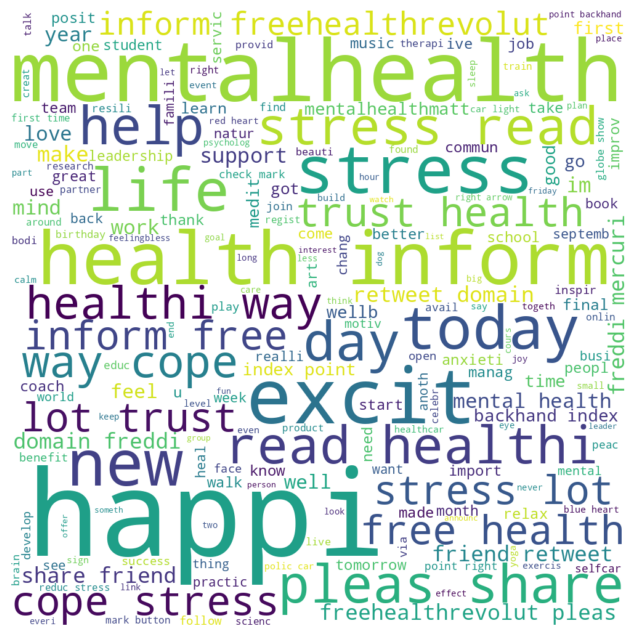

In [92]:
# Directly join the preprocessed text from the DataFrame
tweets_ns = ' '.join(no_stress_df['Cleaned_Text'])

# Create a WordCloud object and generate the word cloud
wordcloud_ns = WordCloud(background_color='white',
                      max_words=200,
                      width=1000,
                      height=1000).generate(tweets_ns)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_ns, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

stress word cloud

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


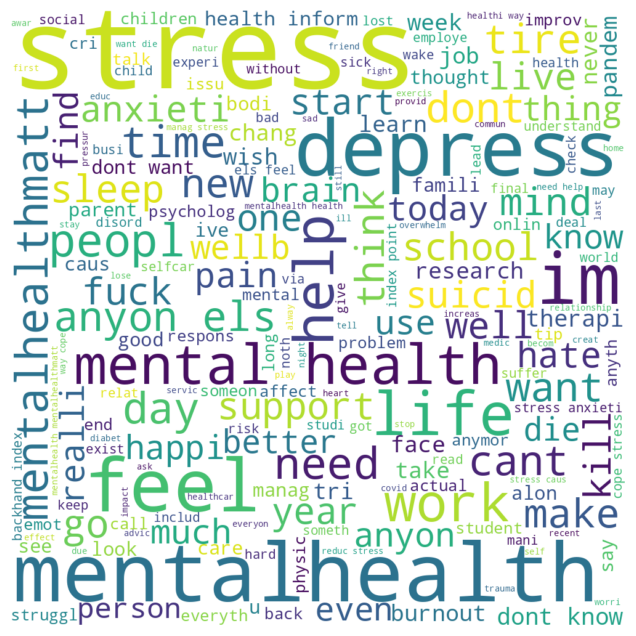

In [93]:
# Directly join the preprocessed text from the DataFrame
tweets_st = ' '.join(stress_df['Cleaned_Text'])

# Create a WordCloud object and generate the word cloud
wordcloud_st = WordCloud(background_color='white',
                      max_words=200,
                      width=1000,
                      height=1000).generate(tweets_st)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud_st, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

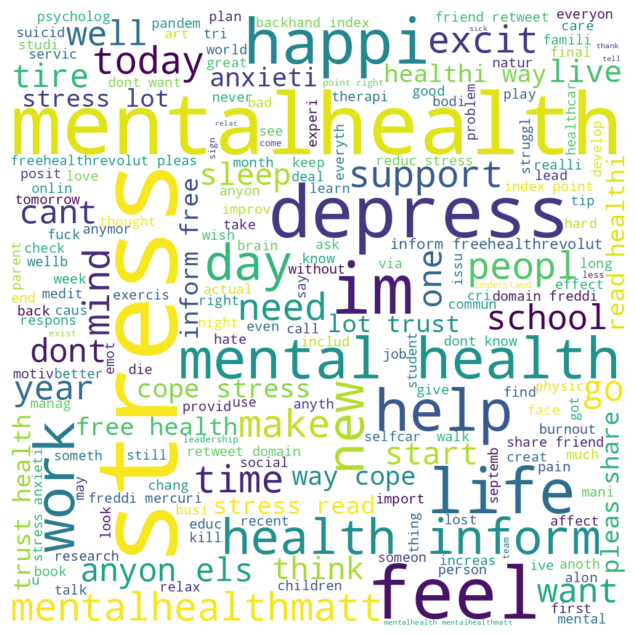

In [33]:
# Directly join the preprocessed text from the DataFrame
tweets = ' '.join(df['Cleaned_Text'])

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(background_color='white',
                      max_words=200,
                      width=1000,
                      height=1000).generate(tweets)

# Display the generated word cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

# SVM

In [34]:
from sklearn.svm import SVC
import gensim
from gensim import corpora
from gensim import matutils
from gensim.models import LsiModel
from gensim.models import TfidfModel

In [35]:
# build word dictionary and dtm
doc_complete = df['Cleaned_Text']

corpus = [doc.split() for doc in doc_complete]

dictionary = corpora.Dictionary(corpus)

dictionary.filter_extremes(no_below=2, no_above=0.75)

DFM = [dictionary.doc2bow(doc) for doc in corpus]

print("Total number of documents:", len(DFM))
print("Total number of unique tokens:", len(dictionary))


Total number of documents: 5174
Total number of unique tokens: 3652


In [36]:
term_maps = dictionary.token2id
term_maps = {v: k for k, v in term_maps.items()}
term_maps

{0: 'envi',
 1: 'swallow',
 2: 'beyond',
 3: 'bomb',
 4: 'f',
 5: 'job',
 6: 'life',
 7: 'point',
 8: 'read',
 9: 'stress',
 10: 'almost',
 11: 'empti',
 12: 'greater',
 13: 'never',
 14: 'happi',
 15: 'im',
 16: 'childhood',
 17: 'possibl',
 18: 'recov',
 19: 'traumat',
 20: 'find',
 21: 'get',
 22: 'hard',
 23: 'morn',
 24: 'reason',
 25: '2',
 26: 'beauti',
 27: 'cant',
 28: 'commit',
 29: 'convinc',
 30: 'cri',
 31: 'famili',
 32: 'go',
 33: 'kitchen',
 34: 'love',
 35: 'next',
 36: 'saw',
 37: 'sometim',
 38: 'stop',
 39: 'suicid',
 40: 'walk',
 41: 'week',
 42: 'break',
 43: 'catch',
 44: 'work',
 45: 'admit',
 46: 'decid',
 47: 'hospit',
 48: 'instead',
 49: 'ive',
 50: 'kill',
 51: 'feel',
 52: 'well',
 53: 'hell',
 54: 'lol',
 55: 'trap',
 56: 'depress',
 57: 'hit',
 58: 'strong',
 59: 'today',
 60: 'averag',
 61: 'child',
 62: 'fact',
 63: 'fun',
 64: 'gift',
 65: 'intellig',
 66: 'mani',
 67: 'peopl',
 68: 'told',
 69: 'younger',
 70: 'win',
 71: '5',
 72: 'date',
 73: 'guy'

In [37]:
tfidf = gensim.models.TfidfModel(DFM)
DFM_tfidf = tfidf[DFM]

In [38]:
DFM

[[(0, 1), (1, 1)],
 [(2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 2)],
 [(10, 1), (11, 1), (12, 1), (13, 1)],
 [(14, 1), (15, 1)],
 [(16, 1), (17, 1), (18, 1), (19, 1)],
 [(15, 1), (20, 2), (21, 1), (22, 1), (23, 1), (24, 1)],
 [(25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1)],
 [(13, 1), (42, 1), (43, 1), (44, 1)],
 [(21, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1)],
 [(15, 1), (51, 1), (52, 2)],
 [(15, 1), (53, 1), (54, 1), (55, 1)],
 [(23, 1), (56, 1), (57, 1), (58, 1), (59, 1)],
 [(60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1)],
 [(70, 1)],
 [(56, 1),
  (59, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 1)],
 [(15, 1), (84, 1), (85, 1), (86, 1), (87, 1)],
 [(21, 1), 

In [39]:
from gensim.models import Word2Vec

model_sim = Word2Vec(corpus, min_count=1)

In [41]:
sim0 = model_sim.wv.most_similar('happi', topn=17)
sim0

[('excit', 0.9998112916946411),
 ('face', 0.9998100399971008),
 ('year', 0.9997941255569458),
 ('new', 0.9997922778129578),
 ('use', 0.9997777938842773),
 ('one', 0.9997560381889343),
 ('mentalhealth', 0.9997364282608032),
 ('life', 0.9997199773788452),
 ('today', 0.9997150301933289),
 ('chang', 0.999704897403717),
 ('day', 0.9996917247772217),
 ('make', 0.9996811151504517),
 ('help', 0.9996755123138428),
 ('first', 0.999660313129425),
 ('love', 0.9996466040611267),
 ('take', 0.9996368288993835),
 ('brain', 0.9996336102485657)]

In [42]:
sim1 = model_sim.wv.most_similar('friend', topn=17)
sim1

[('freddi', 0.9956443905830383),
 ('mercuri', 0.9943870306015015),
 ('domain', 0.9925627112388611),
 ('retweet', 0.9879133701324463),
 ('share', 0.9864683747291565),
 ('health', 0.974009096622467),
 ('mental', 0.9613582491874695),
 ('hurrican', 0.9585433602333069),
 ('herbal', 0.9560198783874512),
 ('download', 0.9552085399627686),
 ('ida', 0.9528961181640625),
 ('remedi', 0.950114905834198),
 ('remot', 0.9494218230247498),
 ('pleas', 0.9494105577468872),
 ('tea', 0.9474340677261353),
 ('free', 0.9472181797027588),
 ('afganistan', 0.9465633034706116)]

In [43]:
sim2 = model_sim.wv.most_similar('depress', topn=17)
sim2

[('get', 0.9996803402900696),
 ('make', 0.9996284246444702),
 ('time', 0.9996111989021301),
 ('peopl', 0.999606192111969),
 ('go', 0.9996033310890198),
 ('live', 0.99958336353302),
 ('day', 0.9995819330215454),
 ('need', 0.9995453357696533),
 ('person', 0.9995327591896057),
 ('school', 0.9995193481445312),
 ('today', 0.9995179176330566),
 ('start', 0.999504804611206),
 ('even', 0.9994977116584778),
 ('cant', 0.999484658241272),
 ('think', 0.9994834065437317),
 ('suicid', 0.999464213848114),
 ('ever', 0.9994635581970215)]

In [44]:
DFM_tfidf

In [45]:
myDFM_clean_tfidf = pd.DataFrame(gensim.matutils.corpus2csc(DFM_tfidf).T.toarray()).rename(columns = term_maps)
myDFM_clean_tfidf

,envi,swallow,beyond,bomb,f,job,life,point,read,stress,...,commiss,incorpor,toler,turmer,analyt,iopsych,cardiovasculardiseas,bankruptci,antistress,echinacea
0,0.662062,0.749449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.000000,0.000000,0.436999,0.558064,0.443768,0.281681,0.201521,0.281681,0.248213,0.199391,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.114930,...,0.0,0.0,0.0,0.305072,0.0,0.0,0.0,0.0,0.321669,0.321669
5170,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
5171,0.000000,0.000000,0.000000,0.000000,0.000000,0.129067,0.000000,0.000000,0.000000,0.045681,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
5172,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037859,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000


In [46]:
myDFM_clean_tfidf.shape

(5174, 3652)

In [47]:
df['labels'].shape

(5174,)

In [48]:
cleaned_df=pd.concat([myDFM_clean_tfidf,df['labels']],axis=1)
cleaned_df.shape

(5174, 3653)

In [49]:
myDFM_clean_tfidf.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)
cleaned_df = pd.concat([myDFM_clean_tfidf, df['labels']], axis=1)
cleaned_df.shape

(5174, 3653)

In [50]:
cleaned_df.describe(include='all')

,envi,swallow,beyond,bomb,f,job,life,point,read,stress,...,incorpor,toler,turmer,analyt,iopsych,cardiovasculardiseas,bankruptci,antistress,echinacea,labels
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,...,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,0.000591,0.000240,0.000677,0.000181,0.000646,0.006640,0.013921,0.004710,0.005875,0.035721,...,0.000106,0.000209,0.000172,0.000100,0.000119,0.000109,0.000209,0.000124,0.000124,0.775609
std,0.019190,0.012462,0.016585,0.009353,0.014952,0.054202,0.064996,0.037931,0.036864,0.088859,...,0.005435,0.008709,0.007129,0.005121,0.006192,0.005579,0.010823,0.006324,0.006324,0.417221
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,0.688751,0.749449,0.805647,0.558064,0.443768,0.942697,1.000000,0.632092,0.927947,1.000000,...,0.301523,0.396312,0.305072,0.279738,0.375411,0.312693,0.640299,0.321669,0.321669,1.000000


In [51]:
cleaned_df.shape

(5174, 3653)

In [52]:
# SVD
from gensim import matutils
from gensim.models import LsiModel

#Selecting 10 topics
n_SVD=10
SVD_model = gensim.models.LsiModel(DFM_tfidf,
                            id2word=dictionary,
                            num_topics=n_SVD)
SVD = SVD_model[DFM_tfidf]

# singular values
singular_values = np.array(SVD_model.projection.s) # singular values
print(singular_values)


[9.17759439 7.90758585 6.72931585 6.16296616 5.9242346  5.81310082
 5.61043116 5.38579611 5.29020408 4.98112009]


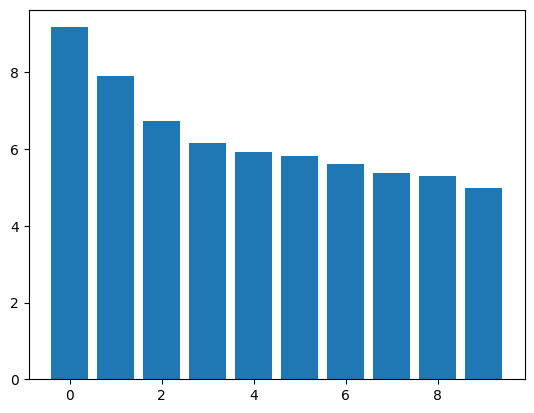

In [53]:
plt.bar(range(len(singular_values)), singular_values)
svd_array = gensim.matutils.corpus2csc(SVD).T.toarray()
svd_df = pd.DataFrame(svd_array)

In [54]:
df['labels'].shape

(5174,)

In [55]:
# concatenates a Pandas DataFrame svd_df with the 'Author' column
model_df = pd.concat([cleaned_df['labels'], svd_df], axis=1)
model_df

,labels,0,1,2,3,4,5,6,7,8,9
0,1,0.000789,0.002162,0.001879,0.000410,0.003123,-0.000350,-0.003341,-0.002735,0.001287,-0.000190
1,1,0.156525,0.073578,-0.129543,0.011836,-0.003542,0.053416,-0.004929,-0.033268,-0.032825,0.036122
2,1,0.010302,0.029335,0.014746,-0.009372,0.003581,0.002688,-0.001177,-0.018819,-0.008101,0.005434
3,0,0.088604,0.289535,0.140437,-0.210953,-0.505082,-0.105034,-0.075033,-0.040082,-0.004554,-0.090915
4,1,0.003865,0.005009,-0.004538,0.000329,0.004217,-0.000877,-0.005766,-0.001256,-0.005651,-0.003796
...,...,...,...,...,...,...,...,...,...,...,...
5169,1,0.076314,0.076845,-0.093938,0.015169,0.029406,-0.049077,0.084405,0.001291,0.051748,-0.028178
5170,1,0.024706,0.039189,-0.011078,0.001120,0.027924,-0.029502,-0.040834,-0.033545,-0.065186,-0.030647
5171,0,0.045016,0.044979,-0.056706,0.009207,0.017302,-0.005591,-0.025275,-0.026261,-0.045545,-0.044104
5172,1,0.035768,0.037035,-0.036563,0.005151,0.006772,-0.003718,-0.016084,-0.016065,-0.023465,-0.000836


In [56]:
n_topics =10

ldamodel = gensim.models.LdaModel(DFM,
                                  num_topics=n_topics,
                                  id2word = dictionary,
                                  passes=20)

In [58]:
!pip install pyLDAvis

import pyLDAvis
pyLDAvis.enable_notebook()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.7 MB/s eta 0:00:00


In [59]:
import pyLDAvis.gensim_models
vis = pyLDAvis.gensim_models.prepare(ldamodel,
                                     DFM,
                                     dictionary)
vis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4     -0.208592 -0.086235       1        1  13.512815
3      0.106330 -0.110206       2        1  12.070776
7      0.080833  0.037346       3        1  11.237874
5     -0.264141 -0.043006       4        1  10.492337
0      0.145227  0.208111       5        1  10.390834
9      0.197499 -0.232262       6        1   9.343517
6      0.110614  0.041141       7        1   8.609936
2     -0.174651  0.095543       8        1   8.342082
8      0.026762  0.191173       9        1   8.096654
1     -0.019881 -0.101605      10        1   7.903174, topic_info=              Term         Freq        Total Category  logprob  loglift
9           stress  1498.000000  1498.000000  Default  30.0000  30.0000
204         health   686.000000   686.000000  Default  29.0000  29.0000
256         mental   297.000000   297.000000  Default  28.0000  28.0000
51            feel   333.000000   333.000000  Default  27.0000  27.0000
1869  mentalhealth   833.000000   833.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
1085         posit    20.265850    57.346891  Topic10  -5.2289   1.4977
409         parent    19.373915    45.929795  Topic10  -5.2739   1.6747
151           even    19.856309    73.630538  Topic10  -5.2493   1.2274
52            well    20.244545   154.222224  Topic10  -5.2300   0.5074
153           good    19.184860    81.457724  Topic10  -5.2837   1.0919

[562 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
302       4  0.131947     1
302       6  0.316672     1
302       7  0.554175     1
2079      9  0.928838   100
25        1  0.725505     2
...     ...       ...   ...
83        4  0.588449  year
83        8  0.407992  year
2165      2  0.912032  yoga
2165      7  0.076003  yoga
402       1  0.988597  your

[860 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 8, 6, 1, 10, 7, 3, 9, 2])

In [60]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state = 42)
X_res, y_res = smote.fit_resample(model_df.loc[:, model_df.columns != 'labels'], model_df['labels'].values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [61]:
X = X_res # model_df.drop(['labels'],axis=1)
Y = y_res #model_df['labels']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
len(Y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8026

In [63]:
# Target Labels  After SMOTE
print('Positive Labels: ',len(y_res == 1))
print('Negative Labels: ',len(y_res== 0))

Positive Labels:  8026
Negative Labels:  8026


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [65]:
#data partition
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(X,Y,test_size=0.2,random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [66]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train,y_train)
tree_predictions=tree.predict(X_val)
tree_predictions

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([0, 0, 0, ..., 1, 1, 1])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


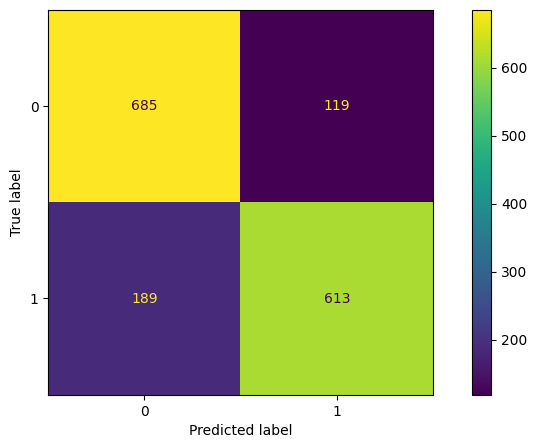

In [67]:
fig, ax = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_val,tree_predictions,ax=ax)

In [68]:
print(classification_report(y_val,tree_predictions))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       804
           1       0.84      0.76      0.80       802

    accuracy                           0.81      1606
   macro avg       0.81      0.81      0.81      1606
weighted avg       0.81      0.81      0.81      1606



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Decision tree: ROC AUC = 0.808 


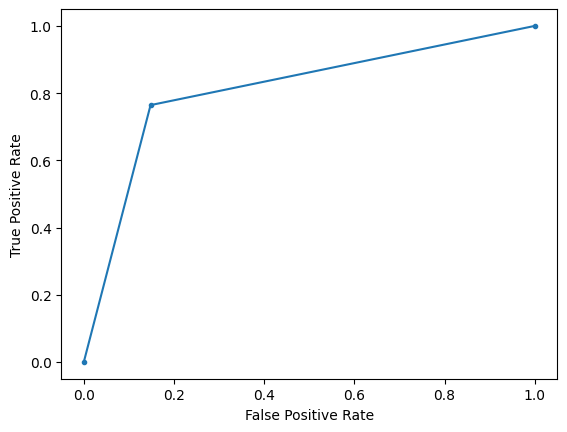

In [69]:
DT_auc = roc_auc_score(y_val,tree_predictions)
print('Decision tree: ROC AUC = %.3f ' % (DT_auc))  # % as a placeholder; f then refers to "Floating point decimal format", 3 number if decimal after the point


DT_fpr, DT_tpr, threshold = roc_curve(y_val,tree_predictions)
plt.plot(DT_fpr,DT_tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


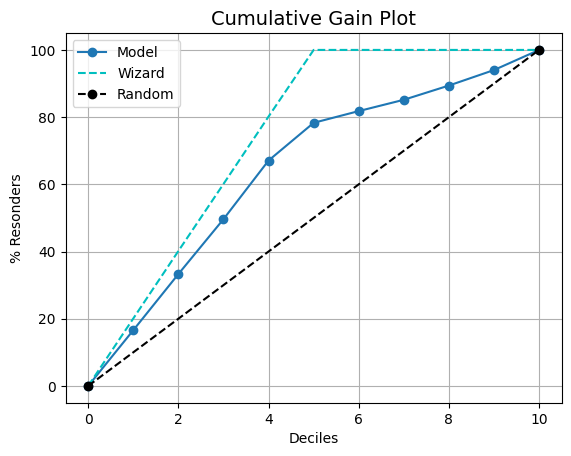

In [70]:
kds.metrics.plot_cumulative_gain(y_val, tree_predictions)

In [71]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_val)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


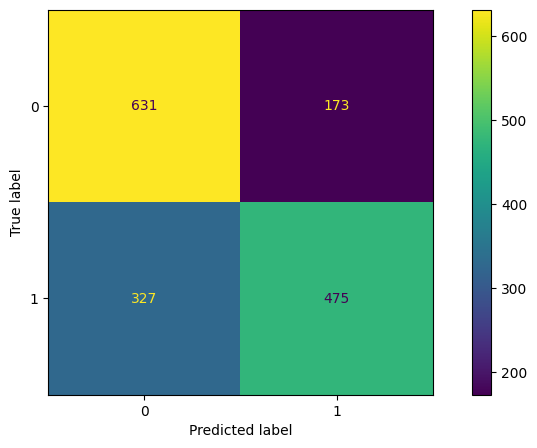

In [72]:
fig, ax = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_val,lr_pred,ax=ax)

In [73]:
print(classification_report(y_val,lr_pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       804
           1       0.73      0.59      0.66       802

    accuracy                           0.69      1606
   macro avg       0.70      0.69      0.69      1606
weighted avg       0.70      0.69      0.69      1606



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Logistic Regression: ROC AUC = 0.689 


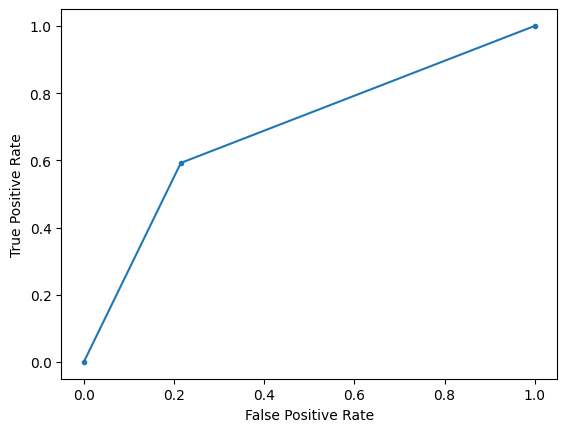

In [74]:
lr_auc = roc_auc_score(y_val,lr_pred)
print('Logistic Regression: ROC AUC = %.3f ' % (lr_auc))  # % as a placeholder; f then refers to "Floating point decimal format", 3 number if decimal after the point


lr_fpr, lr_tpr, threshold = roc_curve(y_val,lr_pred)
plt.plot(lr_fpr,lr_tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()


In [75]:
from sklearn.svm import SVC

svc = SVC(random_state=101)
svc.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVC(random_state=101)

In [76]:
accuracies = cross_val_score(svc,X_train,y_train,cv=5)

print("Train Score:",np.mean(accuracies))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Train Score: 0.7448598130841122


In [77]:
print("Test Score: ",svc.score(X_val,y_val))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Test Score:  0.7465753424657534


In [78]:
param={
    'C':[0.01,0.1,1,10,100],
    'gamma':[0.1,0.25,0.5,0.75,1],
    'kernel': ["linear","rbf","sigmoid"]
}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.model_selection import GridSearchCV

SVM=SVC()
grid = GridSearchCV(estimator =SVM,
                    param_grid = param,
                    verbose =3,cv =10)
grid.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Fitting 10 folds for each of 75 candidates, totalling 750 fits
[CV 1/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.531 total time=   1.5s
[CV 2/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.519 total time=   1.5s
[CV 3/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.516 total time=   1.9s
[CV 4/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.517 total time=   2.5s
[CV 5/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.528 total time=   1.8s
[CV 6/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.514 total time=   1.5s
[CV 7/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.520 total time=   1.5s
[CV 8/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.533 total time=   1.5s
[CV 9/10] END .C=0.01, gamma=0.1, kernel=linear;, score=0.539 total time=   1.5s
[CV 10/10] END C=0.01, gamma=0.1, kernel=linear;, score=0.517 total time=   1.4s
[CV 1/10] END ....C=0.01, gamma=0.1, kernel=rbf;, score=0.537 total time=   2.4s
[CV 2/10] END ....C=0.01, gamma=0.1, kernel=rb

In [80]:
grid.best_params_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [81]:
svm_predict=grid.predict(X_val)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


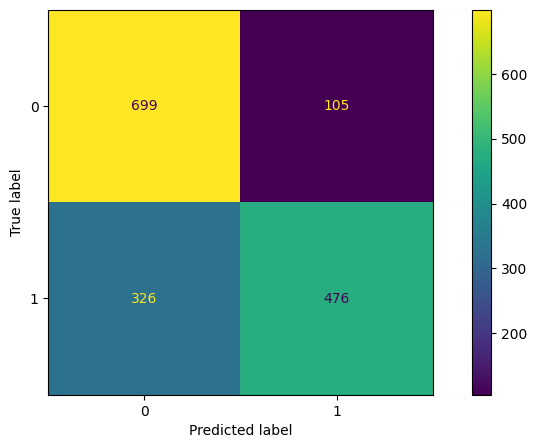

In [82]:
fig, ax = plt.subplots(figsize=(10,5))
ConfusionMatrixDisplay.from_predictions(y_val,svm_predict,ax=ax)

In [83]:
print(classification_report(y_val,svm_predict))

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       804
           1       0.82      0.59      0.69       802

    accuracy                           0.73      1606
   macro avg       0.75      0.73      0.73      1606
weighted avg       0.75      0.73      0.73      1606



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


SVM: ROC AUC = 0.731 


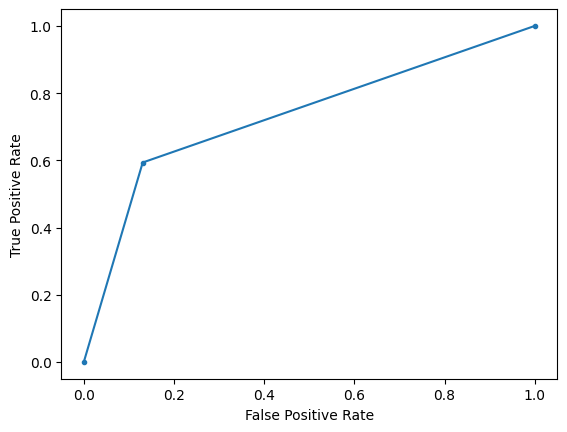

In [84]:
SVM_auc = roc_auc_score(y_val,svm_predict)
print('SVM: ROC AUC = %.3f ' % (SVM_auc))  # % as a placeholder; f then refers to "Floating point decimal format", 3 number if decimal after the point


SVM_fpr, SVM_tpr, threshold = roc_curve(y_val,svm_predict)
plt.plot(SVM_fpr,SVM_tpr,marker='.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

best svm params : {'C': 100, 'gamma': 1, 'kernel': 'rbf'}